<a href="https://colab.research.google.com/github/FoxFortino/DSPS_WFortino/blob/main/Labs/keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist

In [22]:
data = mnist.load_data()

In [23]:
(Xtrain, Ytrain), (Xtest, Ytest) = data

In [24]:
Xtrain.shape

(60000, 28, 28)

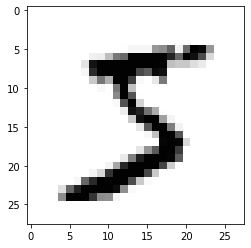

In [25]:
plt.imshow(Xtrain[0], cmap=plt.cm.Greys)

In [26]:
Xtrain[0].dtype, Xtrain[0].max()

(dtype('uint8'), 255)

In [27]:
# Normalize the training and test set
Xtrain = Xtrain.astype(float) / 255
Xtest = Xtest.astype(float) / 255

In [32]:
nImg = Xtrain.shape[0]
nRow = Xtrain.shape[1]
nCol = Xtrain.shape[2]
Xtrain = Xtrain.reshape(nImg, nRow * nCol)
Xtrain.shape

(60000, 784)

In [42]:
nImg = Xtest.shape[0]
nRow = Xtest.shape[1]
nCol = Xtest.shape[2]
Xtest = Xtest.reshape(nImg, nRow * nCol)
Xtest.shape

(10000, 784)

In [34]:
from keras.models import Sequential
from keras.layers import Dense

In [37]:
model_digits = Sequential()
model_digits.add(Dense(128, activation="relu", input_dim=nCol*nRow))
model_digits.add(Dense(64, activation="relu"))
model_digits.add(Dense(128, activation="relu"))
model_digits.add(Dense(nCol*nRow, activation="linear"))

In [40]:
model_digits.compile(optimizer="adadelta", loss="mean_squared_error")

In [41]:
model_digits.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 784)               101136    
                                                                 
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Because this is an autoencoder, we input (Xtrain, Xtrain). But if we were classifying the digits we would input (Xtrain, Ytrain)
model_digits.fit(Xtrain, Xtrain, validation_data=(Xtest, Xtest), epochs=20, batch_size=100, verbose=1)

Epoch 1/20
600/600 [==============================] - 5s 4ms/step - loss: 0.1193 - val_loss: 0.1205
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1178 - val_loss: 0.1191
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1166 - val_loss: 0.1180
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1156 - val_loss: 0.1171
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1148 - val_loss: 0.1163
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1141 - val_loss: 0.1157
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1135 - val_loss: 0.1151
Epoch 8/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1129 - val_loss: 0.1145
Epoch 9/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1124 - val_loss: 0.1141
Epoch 10/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1120 - val_loss: 0.1136